In [0]:
# !pip install shap

     |████████████████████████████████| 276kB 1.4MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394122 sha256=ed195f09d5dbb685c42d0d0044873f31dcb3ddee9e620529bc27767e20fbbb5c
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shap 

import time

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [0]:
def SimulateData_simple(n=120, # number of rows in data
                        M=100, # number of simulations
                        #nCores = M, # number of cores to use; set to 1 on Windows!
                        relevance = 0.15, # signal srength (0 for NULL)
                        #  prevResults= NULL, #legacy, not used
                        ntree = 100, #number of trees in forest
                        #correctBias = c(inbag=TRUE,outbag=TRUE),
                        verbose=0,
                        n_features = 2):
  
  random.seed(123)

  shap_avs = np.array([0,0,0,0,0]) # Initializes the first array
  ft_importances = np.array([0,0,0,0,0]) # Initializes the first array
  shap_vals = np.array([0,0,0,0,0]) # Initializes the first array
  allDFs = [] # List of DFs that will be filled

  for i in range(M):

    x1 = np.random.randn(n)
    x2 = np.random.randint(1, 3, n)
    x3 = np.random.randint(1, 5, n)
    x4 = np.random.randint(1, 11, n)
    x5 = np.random.randint(1, 21, n)
    # y = np.random.binomial(n = 1, p = 0.5 + [-1,1][x2[0]-1] * relevance, size = n)
    y = np.array([]) 
    for i in range(n):
      y = np.append(y, np.random.binomial(n = 1, p = 0.5 + [-1,1][x2[i]-1] * relevance, size = 1))

    x_train = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5}, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
    # y_train = pd.DataFrame({'y': y}, columns=['y'])

    rf = RandomForestRegressor(max_depth=50, random_state=0, n_estimators=ntree,max_features=n_features) 
    rf.fit(x_train, y)
    feature_importances = rf.feature_importances_
    # print(feature_importances)

    shap_values = shap.TreeExplainer(rf).shap_values(x_train)
    shap_averages = np.sum(np.absolute(shap_values), axis=0)

    shap_vals = np.vstack((shap_vals, shap_values))
    shap_avs = np.vstack((shap_avs, shap_averages))
    ft_importances = np.vstack((ft_importances, feature_importances))
    allDFs.append(x_train)
  
  shap_vals = np.delete(shap_vals, (0), axis=0) # Deletes the initialization
  shap_avs = np.delete(shap_avs, (0), axis=0) # Deletes the initialization
  ft_importances = np.delete(ft_importances, (0), axis=0) # Deletes the initialization

  return(shap_vals, shap_avs, ft_importances, allDFs, n)


In [0]:
def beeswarm(simulation, n):
  shap.summary_plot(shap_vals[0+n*simulation:n+n*simulation], allDFs[simulation], show=True)

In [0]:
start_time = time.time()

shap_vals, shap_avs, ft_importances, allDFs, n = SimulateData_simple(n=100, M=100)

print("--- %s seconds ---" % (time.time() - start_time))

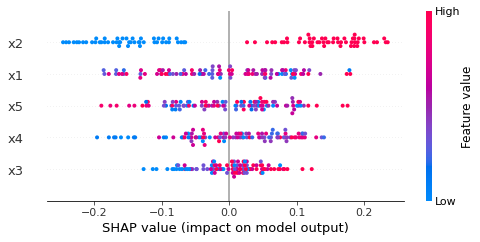

In [0]:
beeswarm(0, n) # plots the M-th simulation 

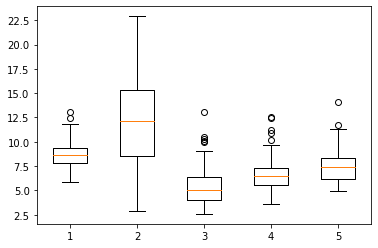

In [0]:
plt.boxplot(shap_avs);

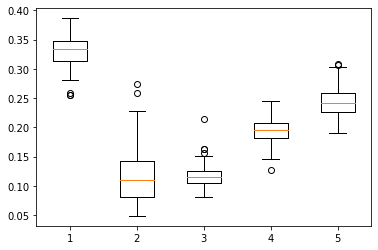

In [0]:
plt.boxplot(ft_importances);